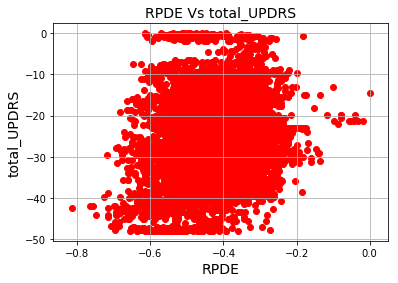

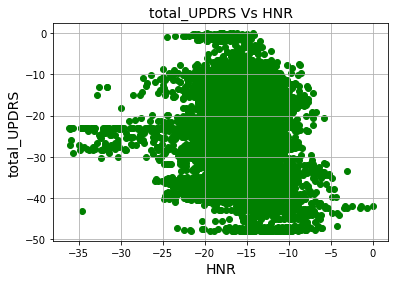

Intercept: 
 -25.557363522419905
Coefficients: 
 [10.36675837 -0.24547492]
10.416089118274314
0.02663846823230509
                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     93.02
Date:                Sat, 24 Aug 2019   Prob (F-statistic):           1.69e-40
Time:                        12:02:22   Log-Likelihood:                -22169.
No. Observations:                5875   AIC:                         4.434e+04
Df Residuals:                    5872   BIC:                         4.436e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

/home/anchit/Anaconda/Anaconda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("..//parkinsons_updrs.data.csv")
X1 = data['RPDE']
X2 = data['HNR']

Y1 = data['total_UPDRS']
Y2 = data['motor_UPDRS']
X1 = np.array((X1 - X1.min())-(X1.max() - X1.min()))
X2 = np.array((X2 - X2.min())-(X2.max() - X2.min()))
Y1 = np.array((Y1 - Y1.min())-(Y1.max() - Y1.min()))

data['RPDE'] = X1
data['HNR'] = X2
data['total_UPDRS'] = Y1

plt.scatter(X1, Y1, color='red')
plt.title('RPDE Vs total_UPDRS', fontsize=14)
plt.xlabel('RPDE', fontsize=14)
plt.ylabel('total_UPDRS', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(X2, Y1, color='green')
plt.title('total_UPDRS Vs HNR', fontsize=14)
plt.xlabel('HNR', fontsize=14)
plt.ylabel('total_UPDRS', fontsize=14)
plt.grid(True)
plt.show()


X = data[['RPDE','HNR']]
Y = data['total_UPDRS']

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


RPDE = 0.7
HNR = 0.11
Y_pred=regr.predict(X_test)
#print ('Predicted total UPDRS: \n', regr.predict(X_test))
test_set_rmse = (np.sqrt(mean_squared_error(Y_test,Y_pred)))

test_set_r2 = r2_score(Y_test, Y_pred)
print(test_set_rmse)
print(test_set_r2)

X = sm.add_constant(X)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)